In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
data = pd.read_csv("../input/digit-recognizer/train.csv")
X_test = pd.read_csv("../input/digit-recognizer/test.csv")
print(data.shape)

(42000, 785)


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
Y_train = data.iloc[:,0]
X_train = data.iloc[:,1:]
print(Y_train.shape)
print(X_train.shape)

(42000,)
(42000, 784)


In [5]:
type(data.iloc[:,0])

pandas.core.series.Series

In [6]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [8]:
X_train, Y_train, X_test = map(torch.tensor,(X_train,Y_train,X_test))

In [9]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    
    
    def init_weights(m):
        if type(m) == nn.Linear:
            torch.nn.init.xavier_normal_(m.weight)
            m.bias.data.fill_(0.01)
        
        
    self.net = nn.Sequential(
        nn.Linear(784, 100), 
        nn.Sigmoid(), 
        nn.Linear(100, 10),
        #nn.Sigmoid(),
        #nn.Linear(10,10),
        nn.Softmax()
    )
    self.net.apply(init_weights)

  def forward(self, X):
    return self.net(X)

In [10]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 200):
    
  loss_arr = {}
    
  for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss_arr[epoch] = loss

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  plt.plot(loss_arr.values())
  plt.xlabel('epoch')
  plt.ylabel('log loss')
  plt.show()
  return loss.item()

In [11]:
def predict(x, model):
    
    outputs = model(x)
    _,y_pred = torch.max(outputs.data, 1)
    return y_pred

def accuracy(x, y, model):
   
    correct = 0
    y_pred = predict(x, model)
    correct += (y_pred==y).sum().item()
    
    print('accuracy = ',correct/420)

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


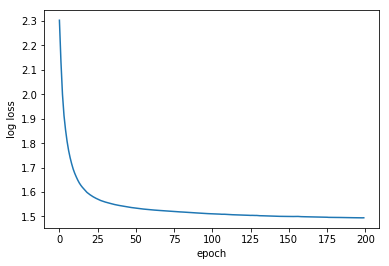

accuracy =  97.53095238095239


In [12]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.Adam(fn.parameters(),lr = 0.009,betas=(0.9,0.99), weight_decay=1e-5)
fit_v2(X_train.float(), Y_train, fn, opt, loss_fn)
accuracy(X_train.float(),Y_train,fn)

In [13]:
Y_pred = predict(X_test.float(), fn)

submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
submission["Label"] = Y_pred
submission = submission[['ImageId', 'Label']]
submission.to_csv("submisision.csv", index=False)